# Random Forest

In [ ]:
#Decision Tree- got 45% to 50% accuracy
#RFR RandomForestRegressor-->89%
#same dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sahilrahmann/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA, DE, DM, DC,DV

In [ ]:
df.shape

(301, 9)

In [ ]:
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df['current_year'] =2024

In [ ]:
df['cno. of year'] = df['current_year'] -df['Year']

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,cno. of year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [ ]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
df.drop(['current_year','Year','Car_Name'], axis=1, inplace= True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,cno. of year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [ ]:
df= pd.get_dummies(df)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,cno. of year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,11,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,7,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,13,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,10,0,1,0,1,0,0,1


In [ ]:
df.shape

(301, 12)

In [ ]:
df.drop(['Fuel_Type_CNG','Seller_Type_Dealer','Transmission_Automatic'], axis=1, inplace= True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,cno. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [ ]:
#still meaning same
#we removed the

In [ ]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,cno. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
cno. of year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


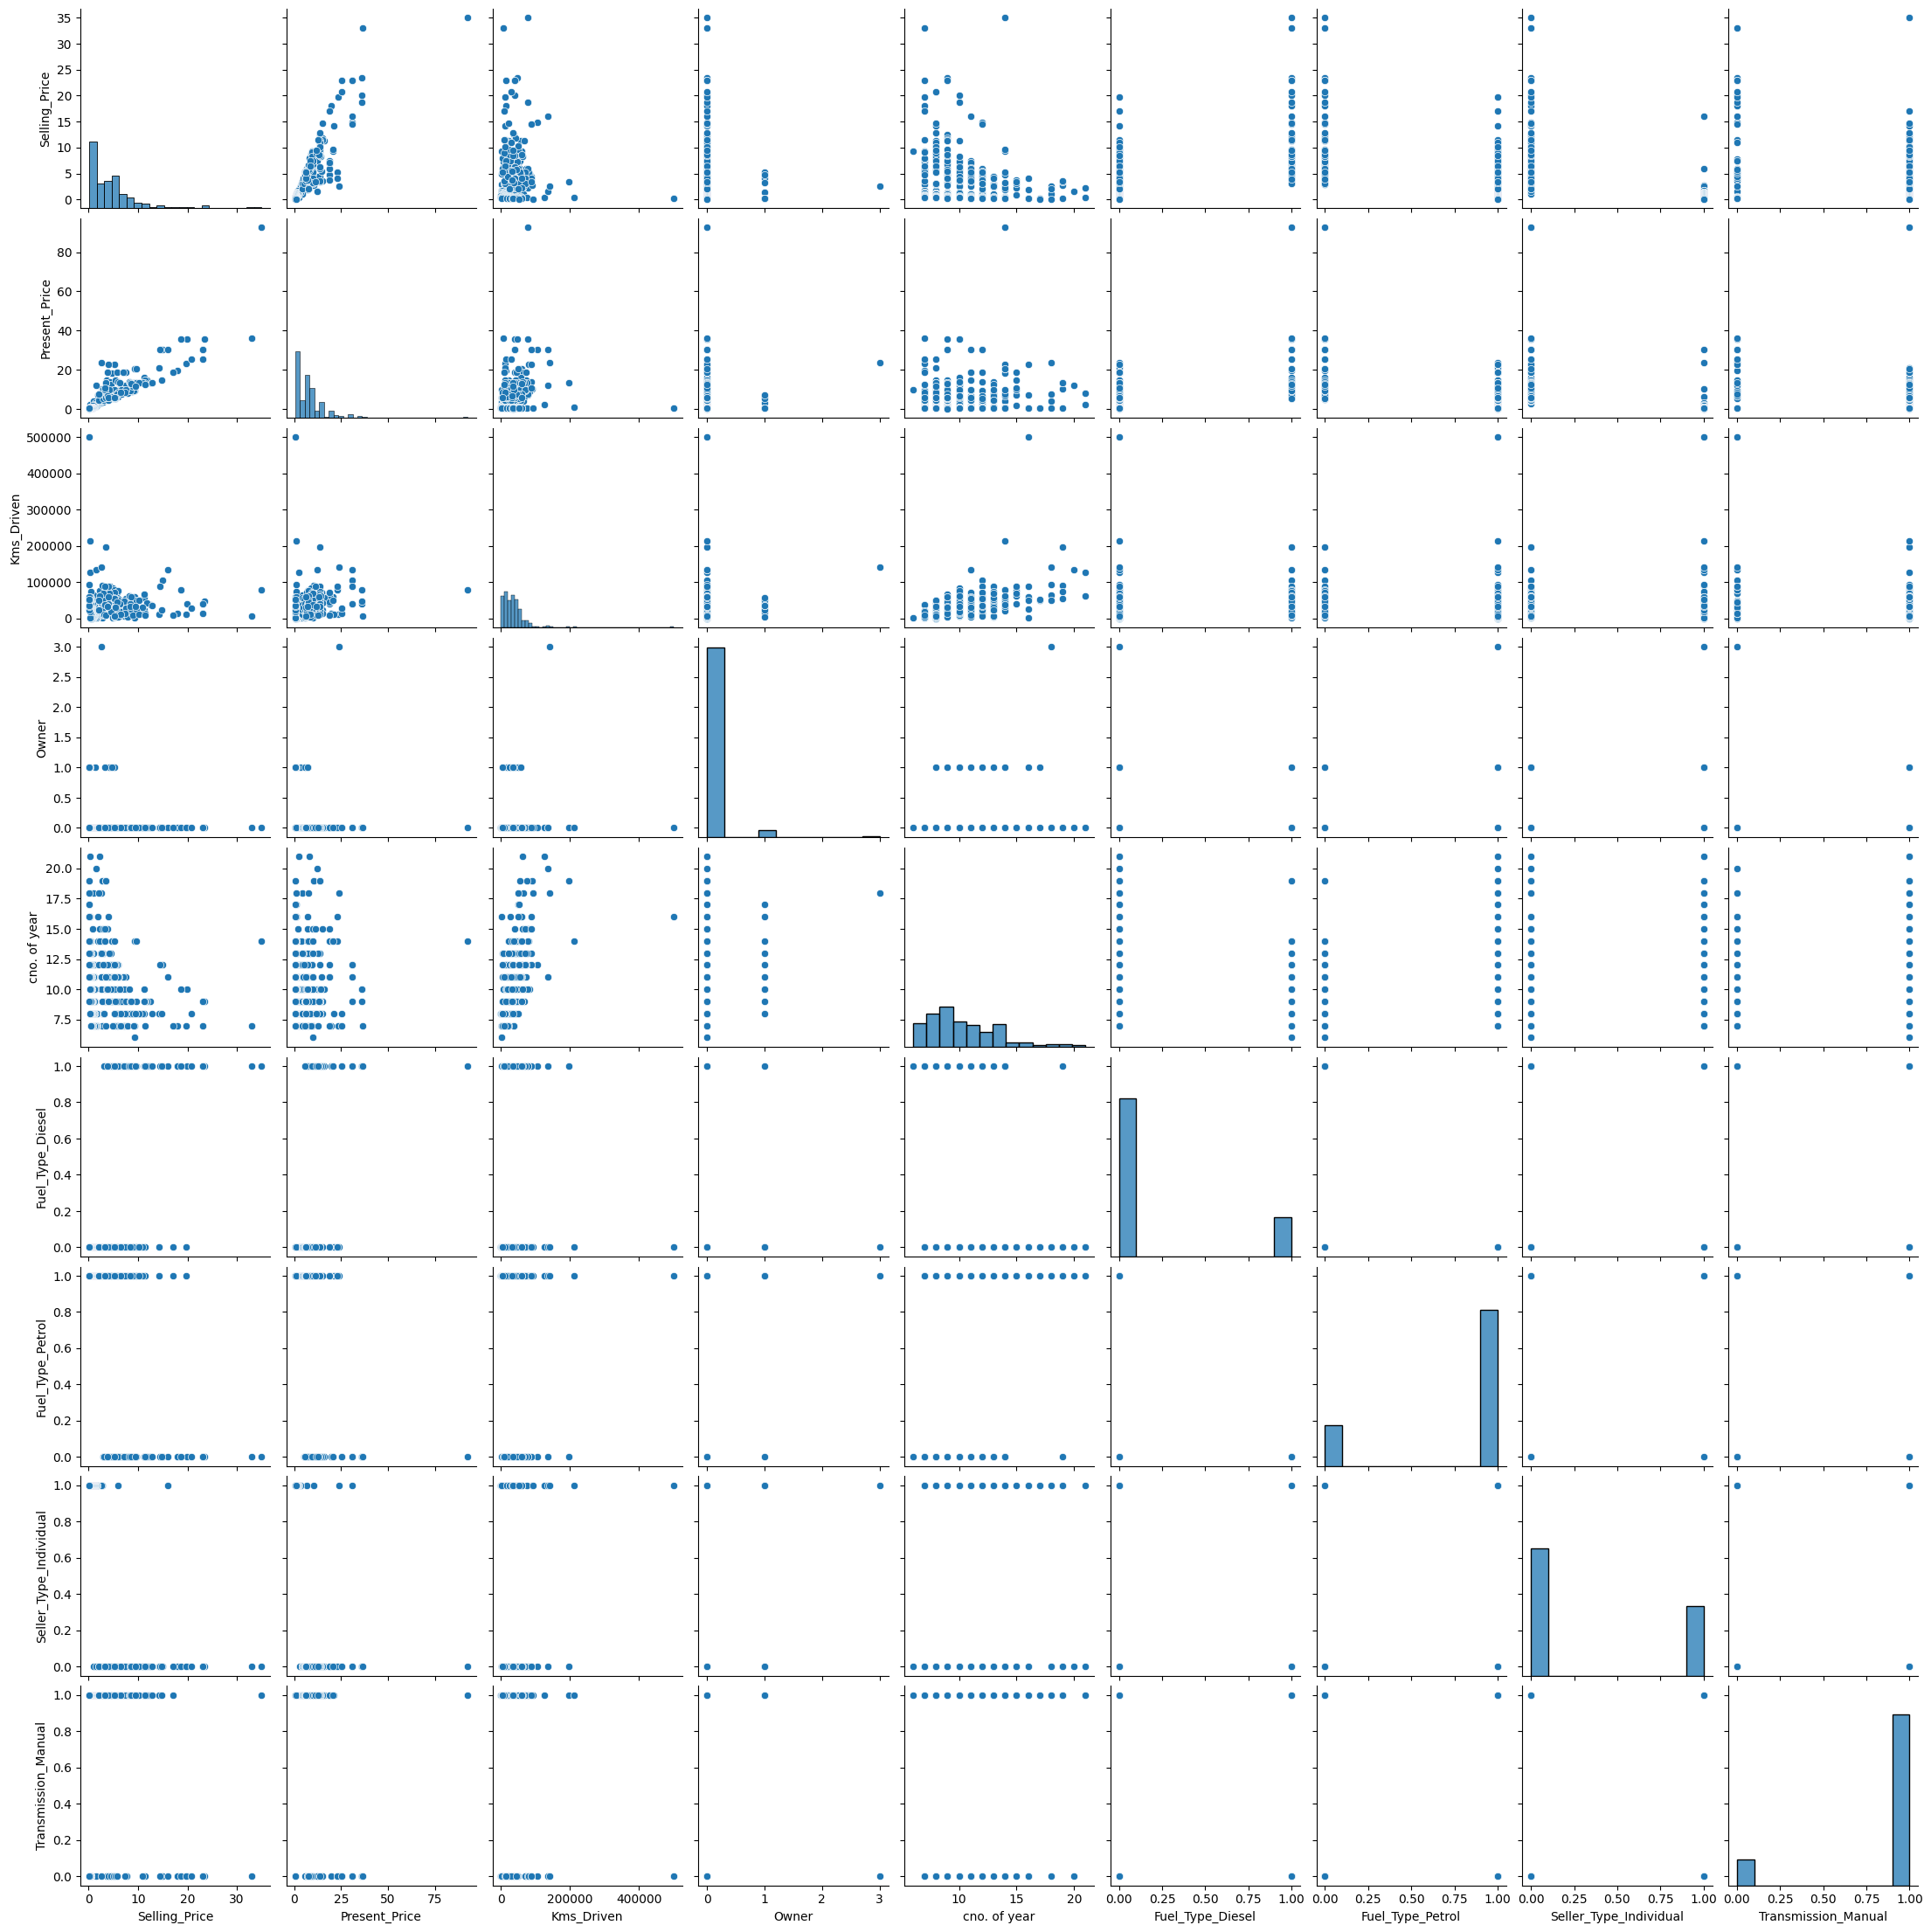

In [ ]:
sns.pairplot(df)

<Axes: >

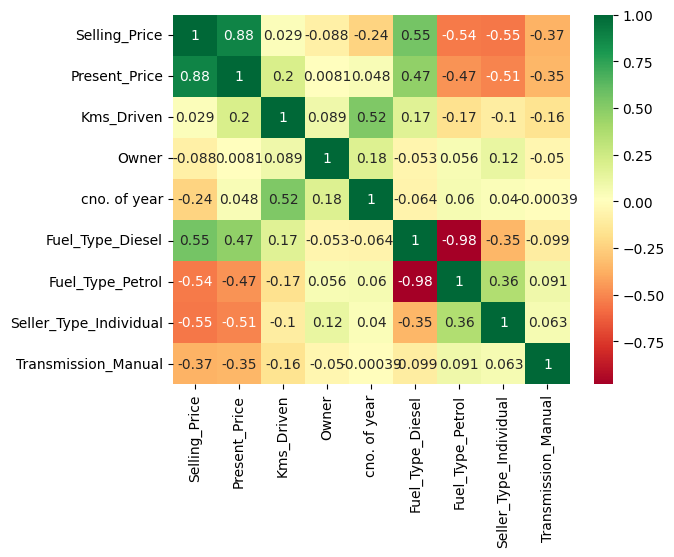

In [ ]:
sns.heatmap(df.corr(), annot= True, cmap="RdYlGn")

In [ ]:
#target= selling prie
#see what all has +ve corr on it

In [ ]:

# col1 is selling price
X=np.array(df.iloc[:,1:])
y=np.array(df.iloc[:,0])

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,cno. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [ ]:
X

array([[5.5900e+00, 2.7000e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.5400e+00, 4.3000e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.8500e+00, 6.9000e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 8.7934e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2500e+01, 9.0000e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.9000e+00, 5.4640e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [ ]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

In [ ]:
##############################################################################################################################

# -----------FEATURE SELECTION---------------
NEW

In [ ]:
#Feature selection - which of the features - more important, so that we we use them
# .'. we need to find which feature is important
# To find which feature is important, we use ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model= ExtraTreesRegressor()

In [ ]:
feat_imp = model.fit(X,y)

In [ ]:
feat_imp.feature_importances_

array([0.38872155, 0.04083798, 0.00072064, 0.07690393, 0.22311603,
       0.01323638, 0.12103227, 0.13543121])

In [ ]:
#X=np.array(df.iloc[:,1:])---> array has no attribute columns
#X=df.iloc[:,1:]-------->has attribute columns
X=df.iloc[:,1:]
imp=pd.Series(feat_imp.feature_importances_, index = X.columns)

<Axes: >

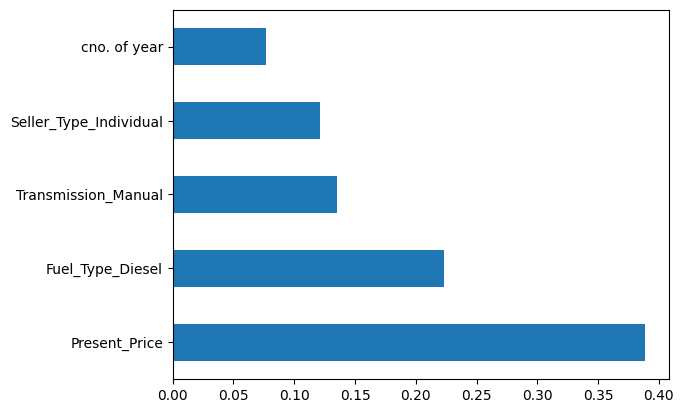

In [ ]:
#plot and see top 5 important features
imp.nlargest(5).plot(kind='barh')

# Split data


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train


,Present_Price,Kms_Driven,Owner,cno. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,7.60,77632,0,10,1,0,0,1
283,11.80,9010,0,8,0,1,0,1
44,2.69,50000,0,12,0,1,0,1
245,9.40,71000,0,12,1,0,0,1
191,0.57,25000,1,12,0,1,1,1
...,...,...,...,...,...,...,...,...
251,9.90,56701,0,11,0,1,0,1
192,0.75,49000,1,17,0,1,1,1
117,1.90,14000,0,9,0,1,1,1
47,4.15,65000,0,18,0,1,0,1


# Model selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()

In [ ]:
####################################################################################################################

#-------------------HYPER PARAMETER TUNING-------------------

In [ ]:
# n_estimatorsint, default=100
# The number of trees in the forest.

In [ ]:
n_estimators =[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

In [ ]:
max_features= ['auto', 'sqrt']

In [ ]:
max_depth =[int(x) for x in np.linspace(start=5, stop=30, num=6)]

In [ ]:
min_samples_split=[2,5,10,15,100]

In [ ]:
min_samples_leaf=[1,2,5,10]

In [ ]:
random_grid ={'n_estimators':n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [ ]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_regressor = RandomizedSearchCV(estimator= regressor,
                                  param_distributions= random_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=5, verbose=2,
                                  random_state=42,
                                  n_jobs=1 )

* Training

In [ ]:
rf_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.1s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.0s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
#can even take months

In [ ]:
rf_regressor.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
#n_estimators was 100 by default


* predict

In [ ]:
y_pred = rf_regressor.predict(X_test)

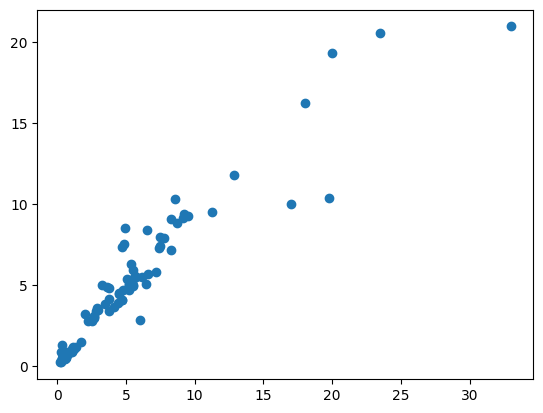

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
finaldf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
finaldf.corr()

,Actual,Predicted
Actual,1.000000,0.944748
Predicted,0.944748,1.000000


<Axes: >

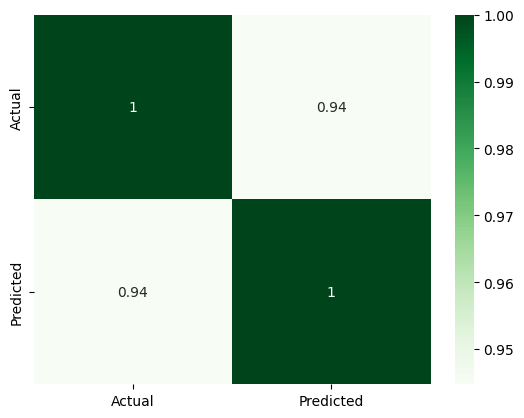

In [ ]:
sns.heatmap(finaldf.corr(), annot= True, cmap='Greens')

* Performance

In [ ]:
r2_score(y_test, y_pred)

0.8657727370477599